<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Count_of_Smaller_Numbers_After_Self_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are given an integer array nums and you have to return a new counts array. The counts array has the property where counts[i] is the number of smaller elements to the right of nums[i].

Example 1:

```
Input: nums = [5,2,6,1]
Output: [2,1,1,0]
Explanation:
To the right of 5 there are 2 smaller elements (2 and 1).
To the right of 2 there is only 1 smaller element (1).
To the right of 6 there is 1 smaller element (1).
To the right of 1 there is 0 smaller element.
```



Example 2:

```
Input: nums = [-1]
Output: [0]
```



Example 3:

```
Input: nums = [-1,-1]
Output: [0,0]
```



Constraints:

```
1 <= nums.length <= 105
-104 <= nums[i] <= 104
```



- Similar to "Right Smaller Than" question

# Solution 1: BST

In [1]:
# Time O(n logn) : Average and O(n^2) Worst
# Space O(n)

class Solution:
    def countSmaller(self, nums):
      if len(nums) == 0:
        return []

      count_smaller = [None for _ in nums]
      bst = SpecialBst(nums[-1])
      count_smaller[-1] = 0
      for i in reversed(range(len(nums) - 1)):
        smaller_count_at_insertion = bst.insert(nums[i])
        count_smaller[i] = smaller_count_at_insertion
      
      return count_smaller
      

class SpecialBst():
    def __init__(self, value):
      self.value = value
      self.left = None
      self.right = None
      self.left_node_count = 0

    def insert(self, value, smaller_count_at_insertion = 0):
      if value < self.value:
        self.left_node_count += 1
        if self.left == None:
          self.left = SpecialBst(value)
        else:
          smaller_count_at_insertion = self.left.insert(value, smaller_count_at_insertion)
      
      else:
        smaller_count_at_insertion += self.left_node_count
        if value > self.value:
          smaller_count_at_insertion += 1
        if self.right == None:
          self.right = SpecialBst(value)
        else:
          smaller_count_at_insertion = self.right.insert(value, smaller_count_at_insertion)
      
      return smaller_count_at_insertion

In [2]:
nums = [5,2,6,1]
count_smaller = Solution().countSmaller(nums)
print(count_smaller)

[2, 1, 1, 0]


# Solution 2: AVL tree

- AVL tree is self-balancing BST. Thus, worst case for insert/delete/search will be log(n)

In [3]:
# Time O(n logn) : Average and Worst
# Space O(n)

class Solution:
    def countSmaller(self, nums):
      if len(nums) == 0:
        return []

      count_smaller = [None for _ in nums]
      tree = AvlTree()
      tree.root, x = tree.insert(nums[-1], tree.root)
      count_smaller[-1] = 0
      for i in reversed(range(len(nums) - 1)):
        tree.root, smaller_count_at_insertion = tree.insert(nums[i], tree.root)
        count_smaller[i] = smaller_count_at_insertion
      
      return count_smaller

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1
        self.left_node_count = 0
        self.right_node_count = 0

class AvlTree():
  def __init__(self):
    self.root = None
  
  def get_height(self, node):
    return node.height if node != None else 0

  def update_height(self, node):
    return 1 + max(self.get_height(node.left), self.get_height(node.right))
  
  def get_balance(self, node):
    return self.get_height(node.left) - self.get_height(node.right)
  
  def get_minimum_value_node(self, node):
    while node.left != None:
      none = node.left
    return node
  
  def get_node_count(self, node):
    if node != None:
      return node.left_node_count + node.right_node_count + 1
    return 0
  
  def rotate_right(self, node):
    a = node.left
    b = a.right
    a.right = node
    node.left = b
    node.height = self.update_height(node)
    a.height = self.update_height(a)

    node.left_node_count = self.get_node_count(b)
    a.right_node_count = self.get_node_count(node)

    return a
  
  def rotate_left(self, node):
    a = node.right
    b = a.left
    a.left = node
    node.right = b
    node.height = self.update_height(node)
    a.height = self.update_height(a)

    node.right_node_count = self.get_node_count(b)
    a.left_node_count = self.get_node_count(node)

    return a
  
  def insert(self, value, root, smaller_count_at_insertion = 0):
    # Step 1 - perform ormal BST
    if root == None:
      return Node(value), smaller_count_at_insertion
    elif value < root.value:
      root.left_node_count += 1
      root.left, smaller_count_at_insertion = self.insert(value, root.left, smaller_count_at_insertion)
    elif value >= root.value:
      smaller_count_at_insertion += root.left_node_count
      if value > root.value: smaller_count_at_insertion += 1
      root.right, smaller_count_at_insertion = self.insert(value, root.right, smaller_count_at_insertion)
      root.right_node_count += 1

    # Step 2 - update height and get balance
    root.height = self.update_height(root)
    balance = self.get_balance(root)

    # Step 3 - perform rotation if not balance
    if balance > 1 and value < root.left.value:
      return self.rotate_right(root), smaller_count_at_insertion
    elif balance < -1 and value > root.right.value:
      return self.rotate_left(root), smaller_count_at_insertion
    elif balance > 1 and value > root.left.value:
      root.left = self.rotate_left(root.left)
      return self.rotate_right(root), smaller_count_at_insertion
    elif balance < -1 and value < root.right.value:
      root.right = self.rotate_right(root.right)
      return self.rotate_left(root), smaller_count_at_insertion

    return root, smaller_count_at_insertion
  
  def preorder(self, root):
    if root is None:
        return
    print(root.value, end=' ')
    self.preorder(root.left)
    self.preorder(root.right)

In [4]:
nums = [5,2,6,1]
count_smaller = Solution().countSmaller(nums)
print(count_smaller)

[2, 1, 1, 0]


In [5]:
nums = [-1]
count_smaller = Solution().countSmaller(nums)
print(count_smaller)

[0]


In [6]:
nums = [-1, -1]
count_smaller = Solution().countSmaller(nums)
print(count_smaller)


[0, 0]


In [7]:
nums = []
count_smaller = Solution().countSmaller(nums)
print(count_smaller)

[]


In [8]:
nums = [8, 5, 11, -1, 3, 4, 2]
count_smaller = Solution().countSmaller(nums)
print(count_smaller)

[5, 4, 4, 0, 1, 1, 0]


# Solution 3: Merge Sort

- count (j - mid) when append element form left array

In [9]:
# Time O(n log n)
# Space O(n)

class Solution:
    def countSmaller(self, nums):
        array = [[v, i] for i, v in enumerate(nums)]
        result = [0 for _ in nums]
        merge_sort(array, 0, len(nums), result)

        return result

# merge_sort [left, right)
def merge_sort(array, left, right, result):
  if right - left <= 1:
    return
  mid = (left + right) // 2
  merge_sort(array, left, mid, result)
  merge_sort(array, mid, right, result)
  merge(array, left, right, mid, result)

def merge(array, left, right, mid, result):
  i = left
  j = mid
  sorted_temp = []
  while i < mid and j < right:
    if array[i][0] <= array[j][0]:
      # (j - mid) numbers jump to left side of array[i]
      result[array[i][1]] += j - mid
      sorted_temp.append(array[i])
      i += 1
    else:
      sorted_temp.append(array[j])
      j += 1
  
  while i < mid:
    result[array[i][1]] += j - mid
    sorted_temp.append(array[i])
    i += 1
  while j < right:
    sorted_temp.append(array[j])
    j += 1
    
  for i in range(left, right):
    array[i] = sorted_temp[i - left]

In [10]:
nums = [5,2,6,1]
count_smaller = Solution().countSmaller(nums)
print(count_smaller)

[2, 1, 1, 0]


In [11]:
nums = [8, 5, 11, -1, 3, 4, 2]
count_smaller = Solution().countSmaller(nums)
print(count_smaller)

[5, 4, 4, 0, 1, 1, 0]


In [12]:
nums = [7, 2, 5, 4, 1, 6]
count_smaller = Solution().countSmaller(nums)
print(count_smaller)

[5, 1, 2, 1, 0, 0]


In [13]:
nums = []
count_smaller = Solution().countSmaller(nums)
print(count_smaller)

[]


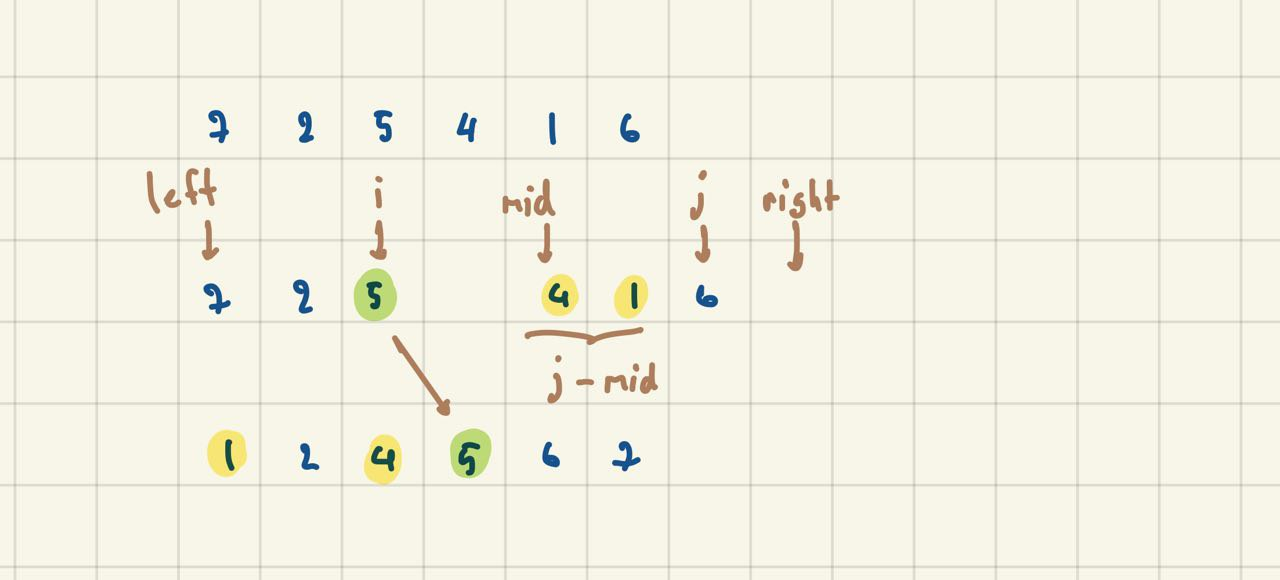